 
# The Sparks Foundation - Task 1
# Prediction using Supervised ML
# Author : Nishitha Taprala

Importing Required Libraries

In [23]:
# Python Libraries
import numpy as np
# numneric calculation
import pandas as pd
import seaborn 

# Libraries for Visualization

import matplotlib.pyplot as plt

# Library for splitting the data in Train and Test
from sklearn.model_selection import train_test_split

# Library required for the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

# Library for the metric required to evaluate the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

%matplotlib inline 
# allow to plot the charts inline

df= pd.read_csv('http://bit.ly.w-data')


In [7]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking for null values

In [18]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

## Counts of Observations  

<AxesSubplot:xlabel='Hours', ylabel='count'>

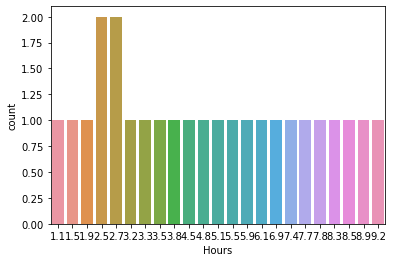

In [9]:
sns.countplot(x="Hours",data=df)

<AxesSubplot:xlabel='Scores', ylabel='count'>

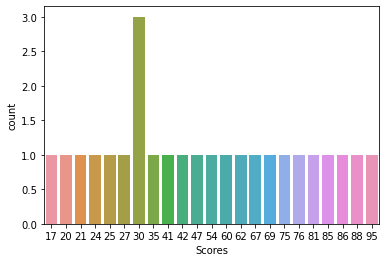

In [10]:
sns.countplot(x="Scores",data=df)

## Checking for Outliers

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Using Scatter Plot

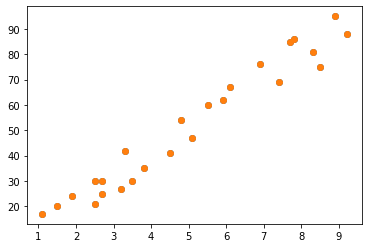

In [12]:
plt.scatter(df.Hours, df.Scores)
feature=df['Hours'].values
target = df['Scores'].values
feature= feature.reshape(-1,1)
target = target.reshape(-1,1)
plt.scatter(feature, target)

## Regression Plot

(0.0, 101.87233370325555)

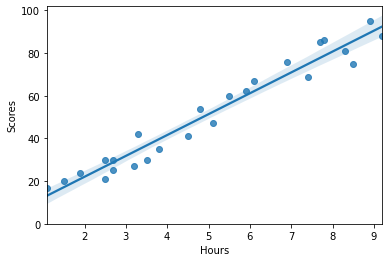

In [19]:
sns.regplot(x="Hours",y="Scores",data=df)
plt.ylim(0,)

#### Positive Linear Relationship

C:\Users\91778\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

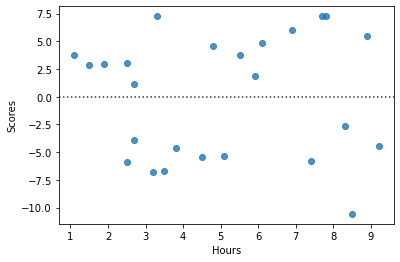

In [20]:
sns.residplot(df['Hours'],df['Scores'])

### Linear Relationship can be developed

In [13]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)
lr = LinearRegression()


X-Train : (20, 1)
X-Test : (5, 1)
Y-Train : (5, 1)
Y-Test : (5, 1)


## Fitting the Model

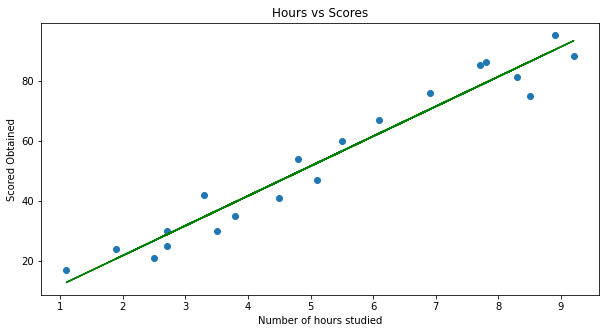

In [21]:

lr.fit(X_train, y_train)
plt.figure(figsize = (10,5))
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = 'green' )
plt.title('Hours vs Scores')
plt.xlabel('Number of hours studied')
plt.ylabel('Scored Obtained')
plt.show()

## Measures for In-Sample Evaluation

In [16]:
pred_vals = lr.predict(X_test)
pred_vals
df_ac_vs_pr = pd.DataFrame(pred_vals, index = range(0,5), columns = ['Predicted'])
df_ac_vs_pr['Actual'] = y_test
print('Mean Absolute Error =', mean_absolute_error(y_test, pred_vals))
print("Mean Squared Error= ", mean_squared_error(y_test, pred_vals))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, pred_vals)))

Mean Absolute Error = 4.183859899002982
Mean Squared Error=  21.598769307217456
Root Mean Squared Error=  4.647447612100373


## Prediction

In [17]:
y = np.array(9.25)
y = y.reshape(-1, 1)
pred_y = lr.predict(y)
pred_y
print('The score obtained after studying for {} hours = {}'.format(y[0][0], pred_y[0][0]))


The score obtained after studying for 9.25 hours = 93.69173248737539


# Predicted Score for 9.25 hours of study = 93.69